# Traitement des données W43-MM1 N2H+ 12M isolated continum substracted crop

In [3]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/coh.npy")

Text(0.5, 1.0, 'Coherent')

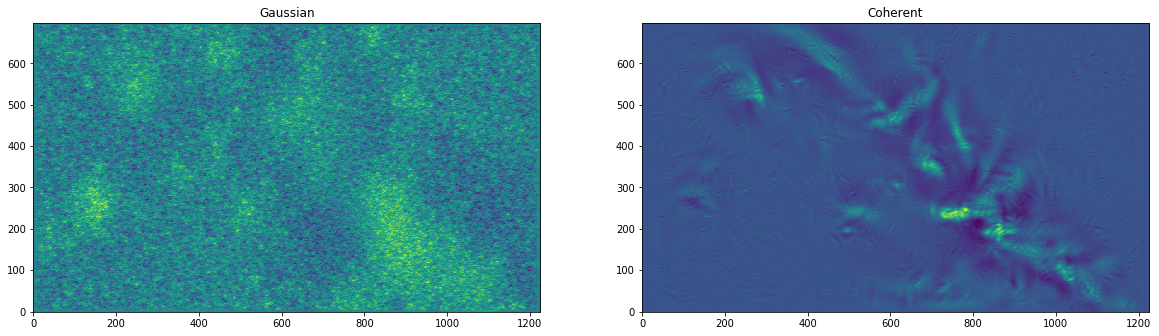

In [3]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

In [4]:
im_ng.shape

(48, 698, 1226)

Text(0.5, 1.0, 'canal 40')

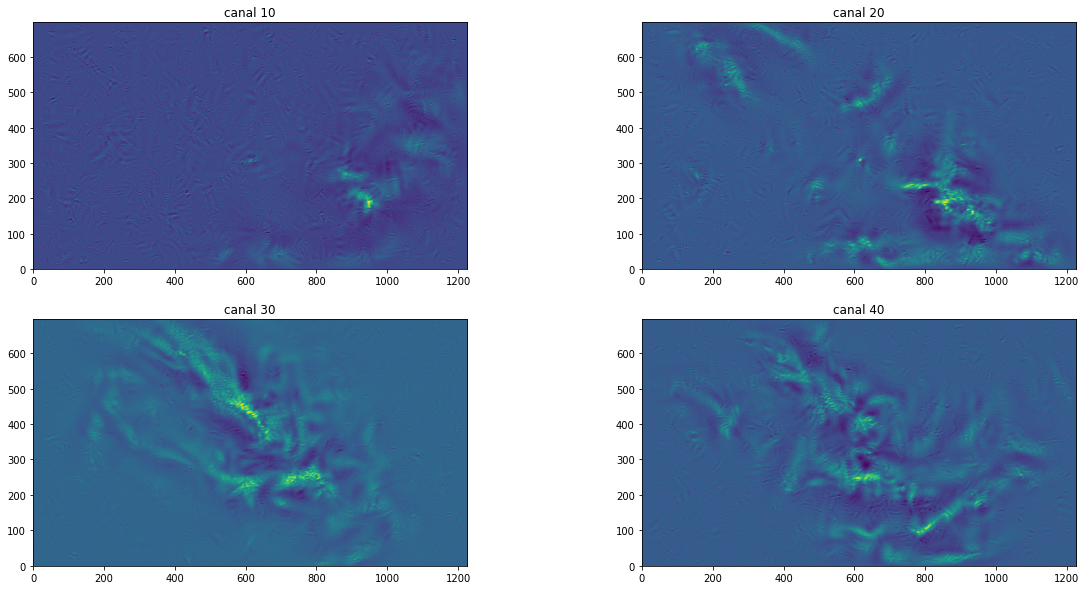

In [5]:
figure(figsize=(20,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[20].real,origin="lower")
title('canal 20')

subplot(2,2,3)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

subplot(2,2,4)
imshow(im_ng[40].real,origin="lower")
title('canal 40')

***
# Transformation des données en fichier fits

In [7]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [8]:
fits.writeto("/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits",im_ng.real, header) 

In [9]:
fits.writeto("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -8.876e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.662e-02 [aplpy.core]


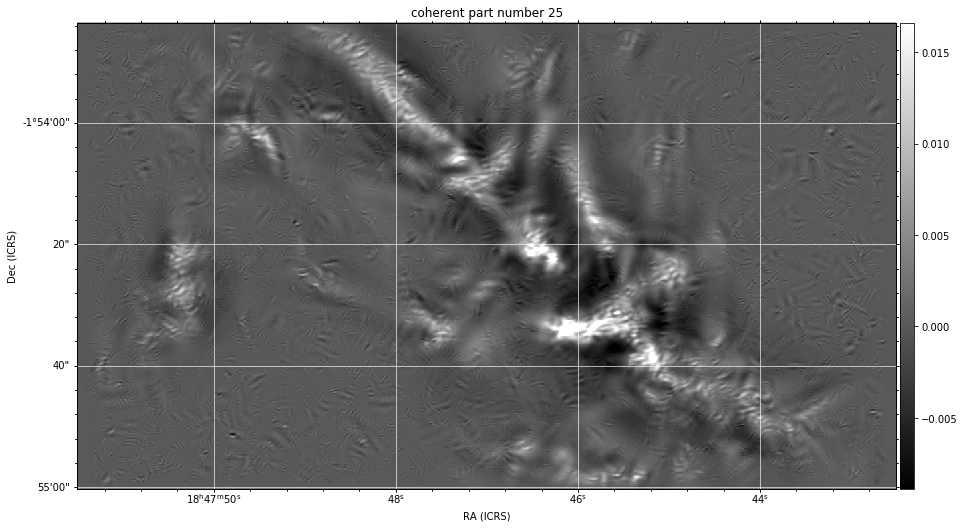

In [10]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 25
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -8.699e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.771e-02 [aplpy.core]
INFO: Auto-setting vmin to -1.132e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.126e-02 [aplpy.core]


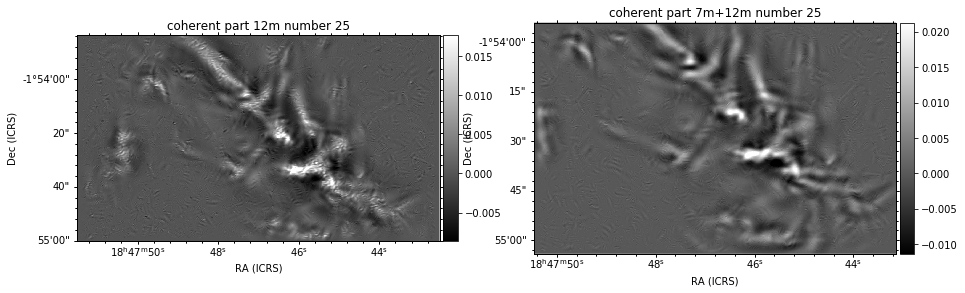

In [11]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 25
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits",figure=fig_all,slices=[nbr],subplot=(1,2,1))
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part 12m number {}".format(nbr))

fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits",figure=fig_all,slices=[nbr],subplot=(1,2,2))
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part 7m+12m number {}".format(nbr))

INFO: Auto-setting vmin to -8.211e-03 [aplpy.core]
INFO: Auto-setting vmax to  9.550e-03 [aplpy.core]


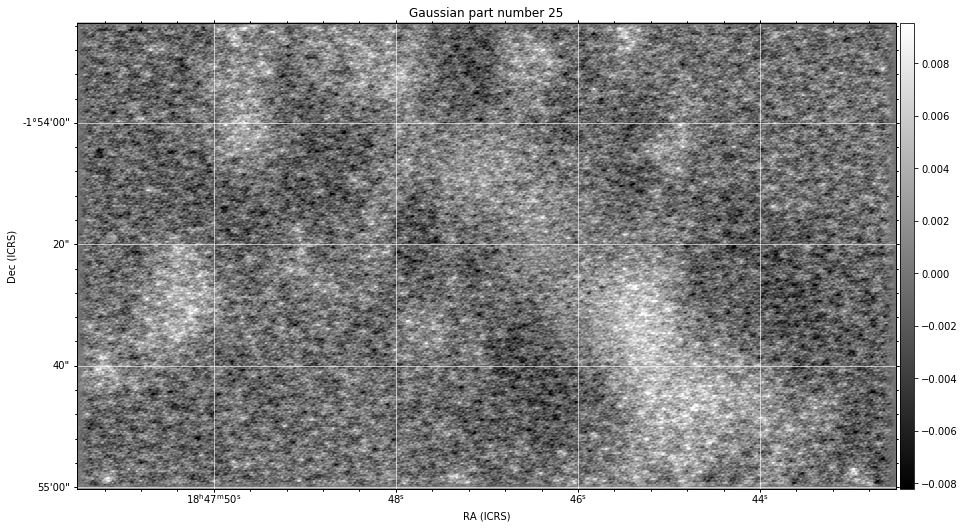

In [11]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

INFO: Auto-setting vmin to -8.794e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.448e-02 [aplpy.core]


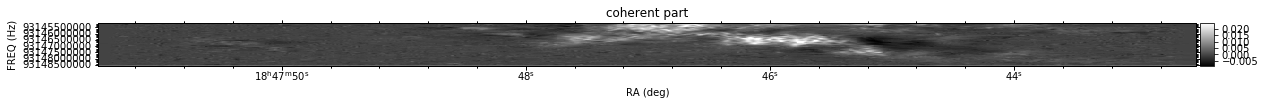

In [13]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits",figure=fig_all,dimensions=[0,2],slices=[250])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part")

***
# creation carte intégré (moment 0)

In [14]:
im_ng.shape

(48, 698, 1226)

In [15]:
im_ng_int = np.sum(im_ng,axis=0)

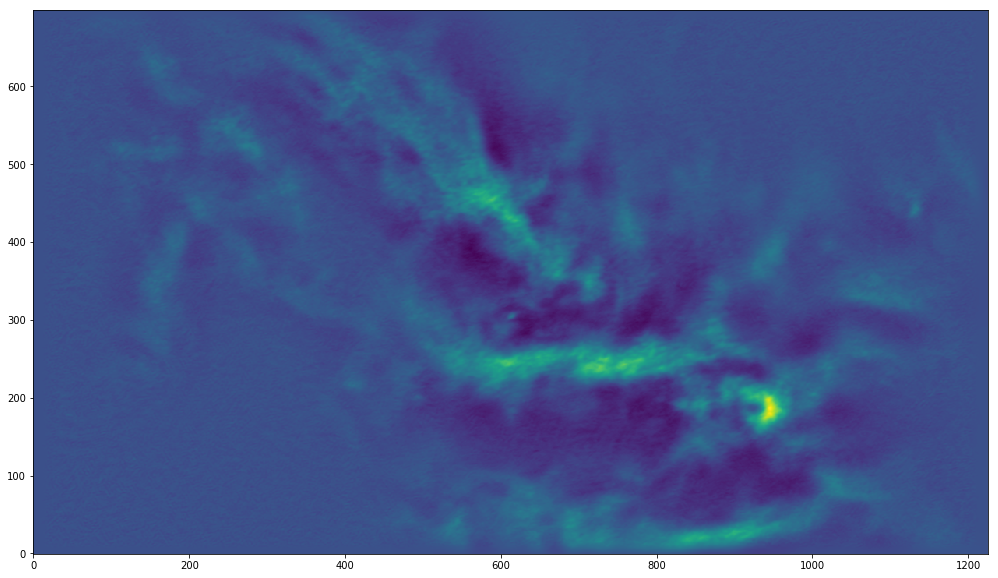

In [16]:
figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")

In [17]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

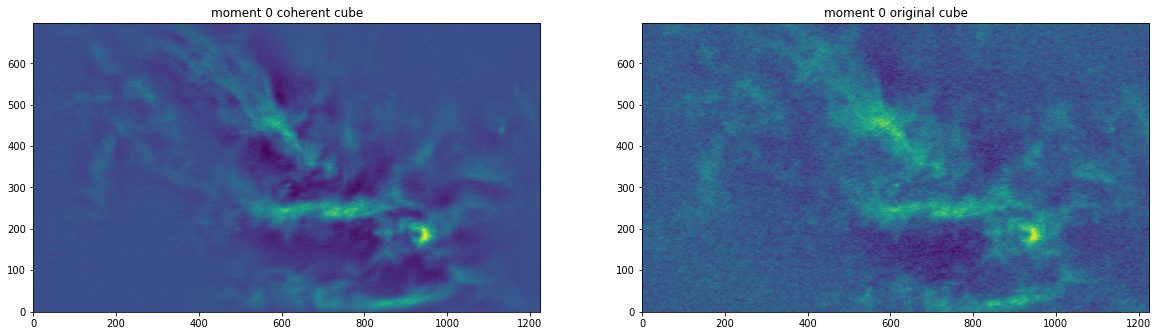

In [18]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [19]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [20]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/w43_12_iso_cnts/ng_t.fits",im_ng_int.real, header,overwrite= True) 

INFO: Auto-setting vmin to -6.078e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.618e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.374e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.368e-01 [aplpy.core]


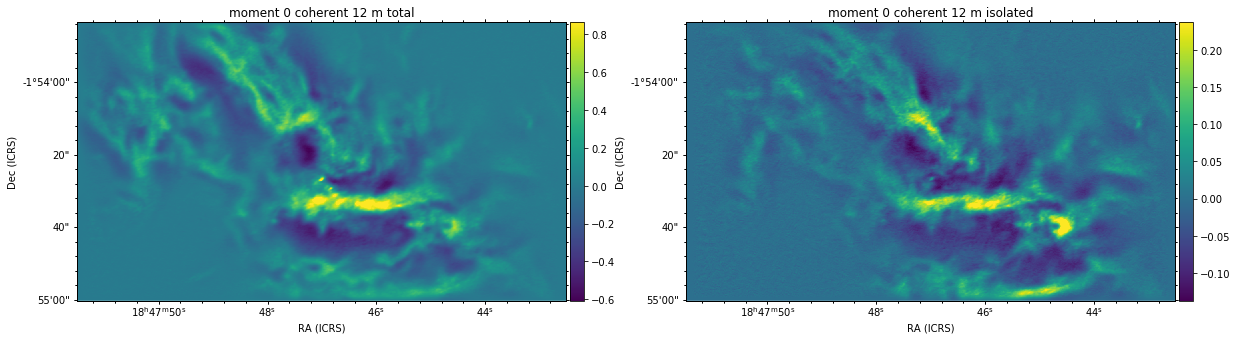

In [21]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_n2hp/ng_t.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12 m total")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12 m isolated")

In [24]:
from pywavan import subfits
input1 = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-mom0.fits'
output = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-mom0_cut.fits'
coord = np.array([507,809,1732,1506])
subfits(input1,output,coord)

Dimensions 1226 698


INFO: Auto-setting vmin to -4.912e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.411e-02 [aplpy.core]
INFO: Auto-setting vmin to -1.408e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.795e-01 [aplpy.core]


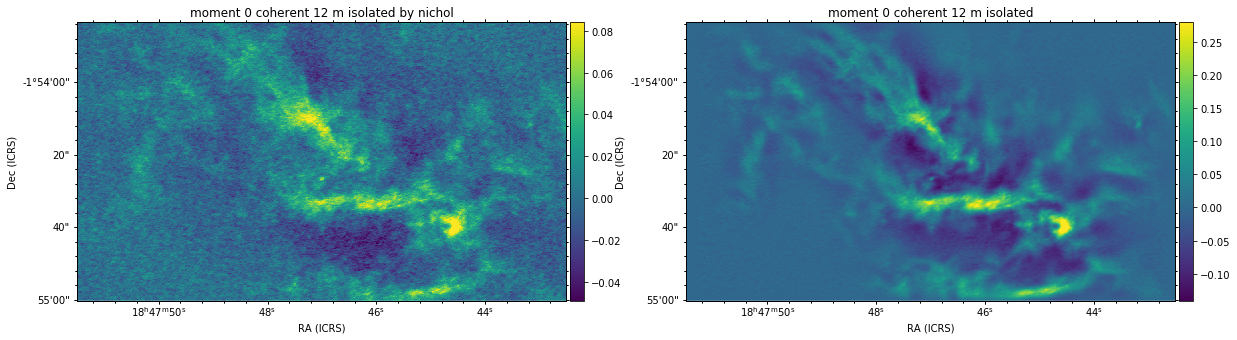

In [26]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-mom0_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12 m isolated by nichol")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12 m isolated")

***
# Moment 1

In [54]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [197]:
im_g = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/coh.npy")

In [43]:
input1 = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-0.01pix-mom1.fits'
output = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-0.01pix-mom1_cut.fits'
coord = np.array([507,809,1732,1506])
subfits(input1,output,coord)

Dimensions 1226 698


***

## moment 1 data masked

In [171]:

im_ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/coh.npy")
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for i in range(N):
    cube[i,:,:] -= np.mean(cube[i,:,:])
    moy = (cube[i,:,:]).mean()
    im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:200,5:200]).mean()] = moy
    im_ng[i,:,:] = im_ng[i,:,:] + im_ad
    
    im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_rmv[(im_ng_2d)<=np.abs(cube[i,:,:]).mean()] = np.nan
    im_ng[i,:,:] = im_ng[i,:,:] + im_rmv
    #im_g[i,:,:] = im_g[i,:,:]+moy

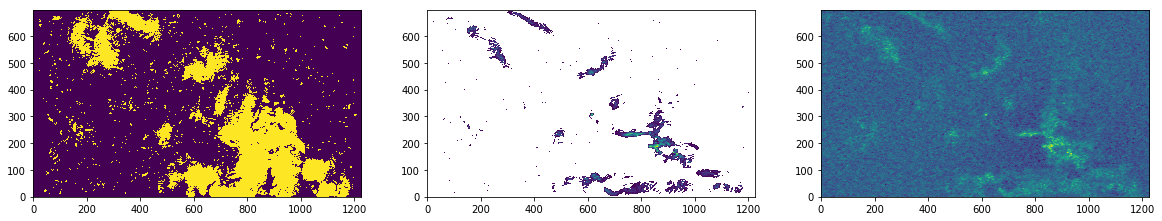

In [170]:
figure(figsize=(20,20))
subplot(131)
imshow(im_ad.real,origin="lower")

subplot(132)
imshow(im_ng[20].real,origin="lower")

subplot(133)
imshow(cube[20].real,origin="lower")

In [172]:
fits.writeto("/user/homedir/soldanof/ng_w43_12_mean_M_pos.fits",im_ng.real, header, overwrite = True) 

***    

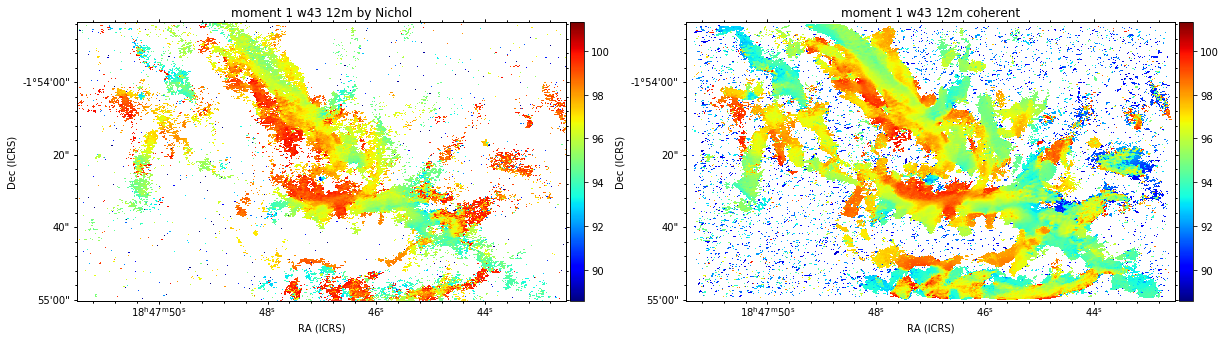

In [12]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-0.01pix-mom1_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet', vmin =8.860e+01, vmax = 1.013e+02 )
f.add_colorbar()
f.set_title("moment 1 w43 12m by Nichol")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet', vmin =8.860e+01, vmax = 1.013e+02)
f.add_colorbar()
f.set_title("moment 1 w43 12m coherent")

Text(0.5, 1.0, 'W43 comparaison between 12M coherent and original by Nichol')

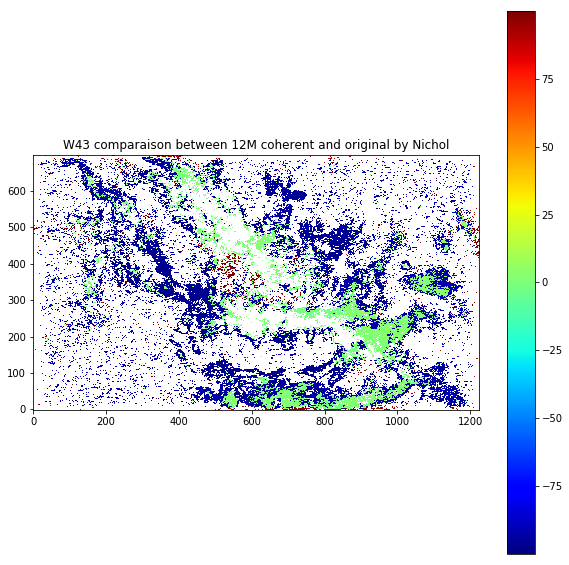

In [181]:
HDU = fits.open("/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits")
cube_7_12 = HDU[0].data
cube_7_12[np.isnan(cube_7_12)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop-0.01pix-mom1_cut.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_12-cube_7_12
diff[np.abs(diff)<0.5]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("W43 comparaison between 12M coherent and original by Nichol")

***
# Traitement des donnée du spectre de puissance

In [27]:
t = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/wave_k.npy")

Fonction de trace du spectre de puissance

In [28]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

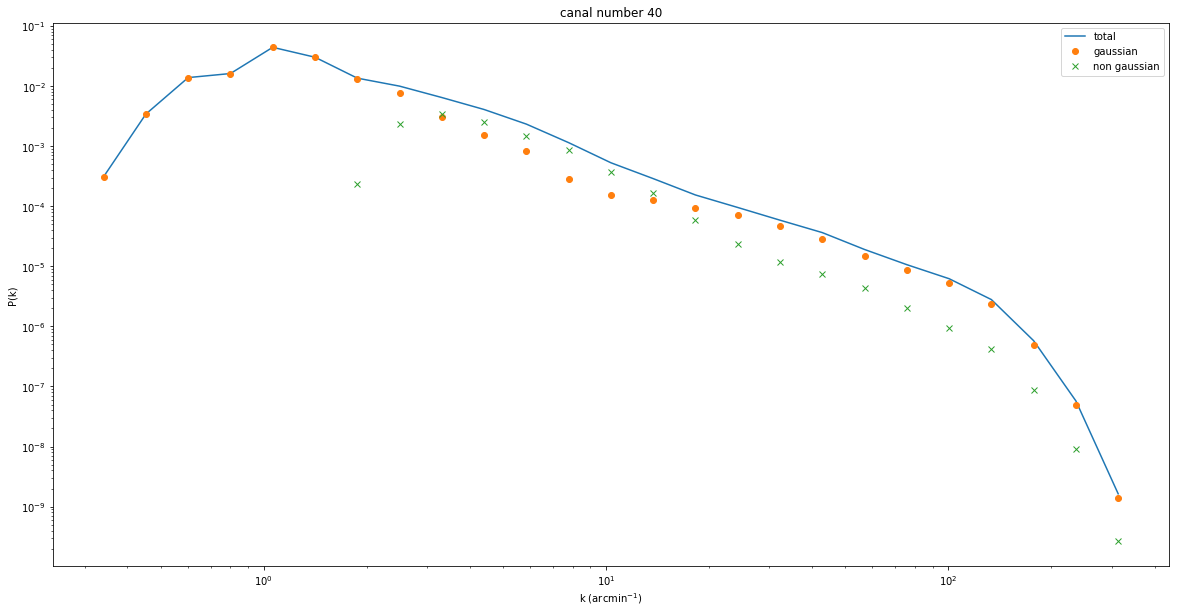

In [29]:
figure(figsize=(20,10))
affiche(40)

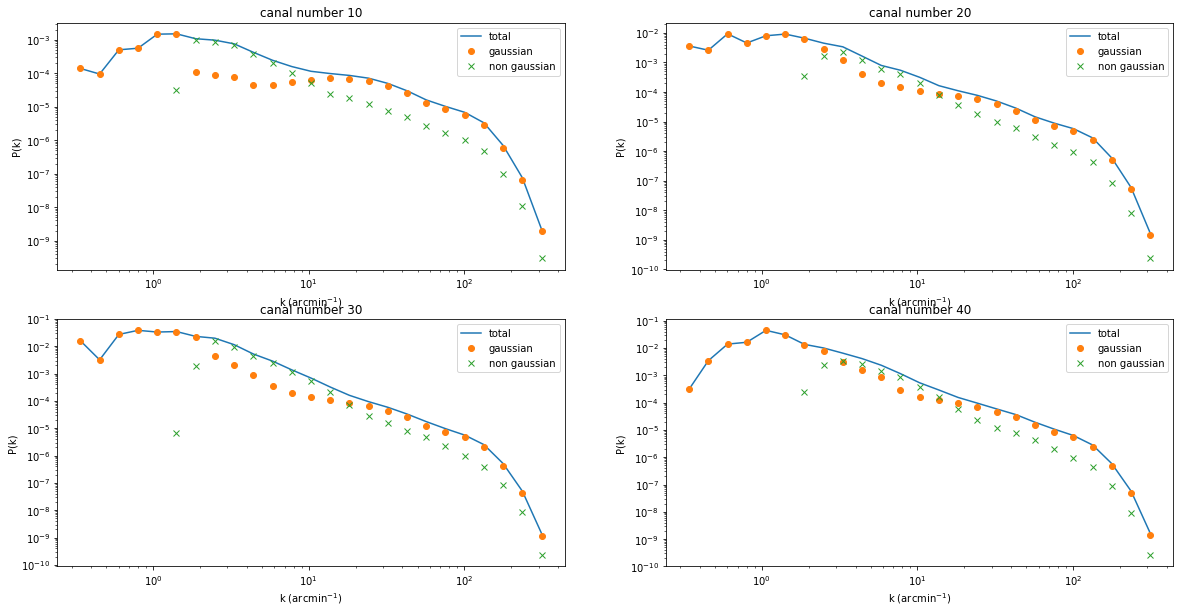

In [30]:
figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(20)

subplot(2,2,3)
affiche(30)

subplot(2,2,4)
affiche(40)

***
# Coupe avec pvextractor

In [4]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [5]:
filname = "/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits"
HDU = fits.open(filname)
cube = HDU[0].data
header = HDU[0].header

In [6]:
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
    del header['CROTA1']
    del header['CROTA2']


w = wcs.WCS(header)

***
# Représentation des 4 premier coeur

In [7]:
c1 = SkyCoord('18:47:47.02 -1:54:26.86', unit=(u.hourangle, u.deg))
sky1 = w.world_to_pixel(c1,9.31491784e+10*u.Hz)[0:2]

c2 = SkyCoord('18:47:46.84 -1:54:29.30', unit=(u.hourangle, u.deg))
sky2 = w.world_to_pixel(c2,9.31491784e+10*u.Hz)[0:2]

c3 = SkyCoord('18:47:46.37 -1:54:33.41', unit=(u.hourangle, u.deg))
sky3 = w.world_to_pixel(c3,9.31491784e+10*u.Hz)[0:2]

c4 = SkyCoord('18:47:46.98 -1:54:26.42', unit=(u.hourangle, u.deg))
sky4 = w.world_to_pixel(c4,9.31491784e+10*u.Hz)[0:2]

Text(0.5, 1.0, 'moment 0 coherent')

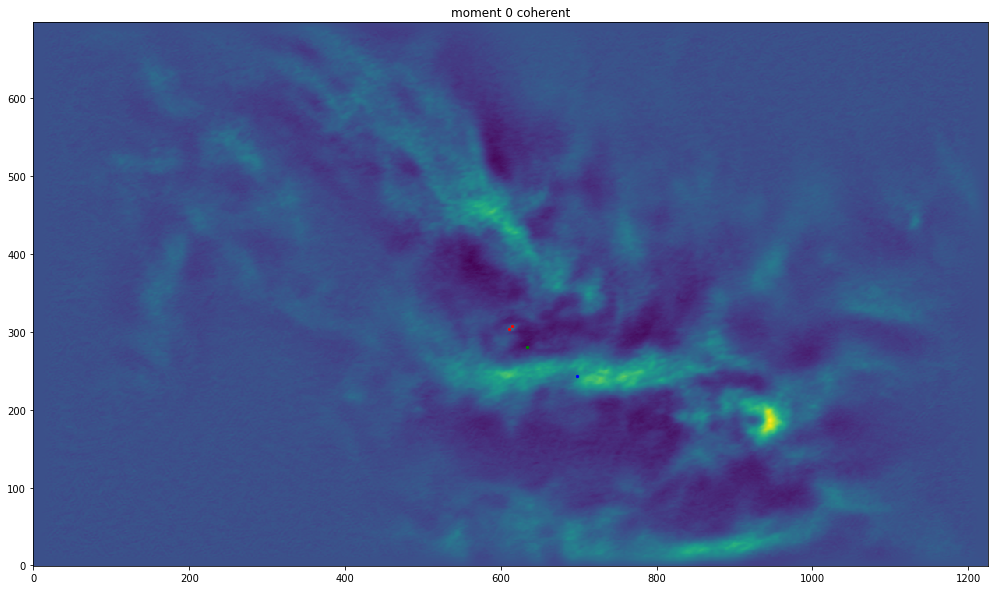

In [36]:
figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")
plt.scatter(int(sky4[0]), int(sky4[1]), s=5, c='r', marker='o')
plt.scatter(int(sky3[0]), int(sky3[1]), s=5, c='b', marker='o')
plt.scatter(int(sky2[0]), int(sky2[1]), s=5, c='g', marker='o')
plt.scatter(int(sky1[0]), int(sky1[1]), s=5, c='r', marker='o')
title('moment 0 coherent')

***
## coupe 1

In [8]:
filname = "/user/workdir/soldanof/data/w43_12_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
	del header['CROTA1']
	del header['CROTA2']
	del header['CROTA3']

w = wcs.WCS(header)

#Slice extraction

p1 = SkyCoord('18:47:48.706 -1:54:06.057', unit=(u.hourangle, u.deg))
skyp1 = w.world_to_pixel(p1,9.31491784e+10*u.Hz)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

p2 = SkyCoord('18:47:46.957 -1:53:48.464', unit=(u.hourangle, u.deg))
skyp2 = w.world_to_pixel(p2,9.31491784e+10*u.Hz)[0:2]
x2= int(skyp2[0])
y2= int(skyp2[1])

pt = [(x1,y1),(x2,y2)]
print(pt)
width = 10

path = Path(pt, width=width)
pv_diag = extract_pv_slice(data[15:48,:,:], path, wcs=w)

[(380, 492), (618, 652)]



INFO: Auto-setting vmin to -8.897e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.336e-02 [aplpy.core]


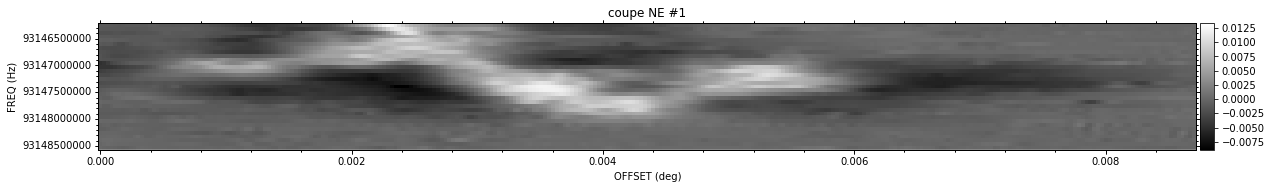

In [194]:
fig_vel = plt.figure(6,figsize=(20,20))
f3 = aplpy.FITSFigure(pv_diag,figure=fig_vel)
f3.show_colorscale(cmap='gray')
f3.set_title("coupe NE #1")
f3.add_colorbar()

Text(0.5, 1.0, 'moment 1 coherent')

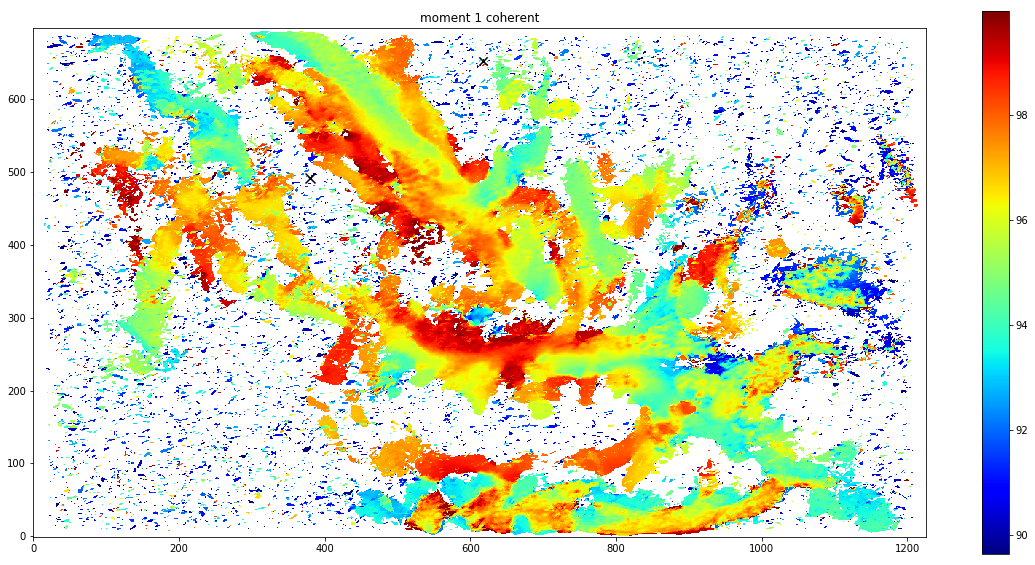

In [9]:
figure(figsize=(20,10))
filname = "/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits"
HDU = fits.open(filname)
moment1 = HDU[0].data
imshow(moment1,origin="lower",cmap='jet')
colorbar()
plt.scatter(x1, y1, s=100, c='k', marker='x')
plt.scatter(x2, y2, s=70, c='k', marker='x')

title('moment 1 coherent')